<a href="https://www.kaggle.com/yashj05/women-clothing-e-commerce-review-text-data-eda?scriptVersionId=85588049" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# EDA on Text Data

## Women's E-Commerce Clothing reviews

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [2]:
import plotly as py
import cufflinks as cf

/opt/conda/lib/python3.7/site-packages/geopandas/_compat.py:115: UserWarning:

The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.



In [3]:
from plotly.offline import iplot

In [4]:
py.offline.init_notebook_mode(connected=True)
cf.go_offline()

### Data Import

In [5]:
df = pd.read_csv('../input/womens-ecommerce-clothing-reviews/Womens Clothing E-Commerce Reviews.csv', index_col=0)
df.head()

Clothing ID  Age                    Title  \
0          767   33                      NaN   
1         1080   34                      NaN   
2         1077   60  Some major design flaws   
3         1049   50         My favorite buy!   
4          847   47         Flattering shirt   

                                         Review Text  Rating  Recommended IND  \
0  Absolutely wonderful - silky and sexy and comf...       4                1   
1  Love this dress!  it's sooo pretty.  i happene...       5                1   
2  I had such high hopes for this dress and reall...       3                0   
3  I love, love, love this jumpsuit. it's fun, fl...       5                1   
4  This shirt is very flattering to all due to th...       5                1   

   Positive Feedback Count   Division Name Department Name Class Name  
0                        0       Initmates        Intimate  Intimates  
1                        4         General         Dresses    Dresses  
2                        0         General         Dresses    Dresses  
3                        0  General Petite         Bottoms      Pants  
4                        6         General            Tops    Blouses

In [6]:
df.drop(labels=['Clothing ID', 'Title'], axis=1, inplace=True)
df.head()

Age                                        Review Text  Rating  \
0   33  Absolutely wonderful - silky and sexy and comf...       4   
1   34  Love this dress!  it's sooo pretty.  i happene...       5   
2   60  I had such high hopes for this dress and reall...       3   
3   50  I love, love, love this jumpsuit. it's fun, fl...       5   
4   47  This shirt is very flattering to all due to th...       5   

   Recommended IND  Positive Feedback Count   Division Name Department Name  \
0                1                        0       Initmates        Intimate   
1                1                        4         General         Dresses   
2                0                        0         General         Dresses   
3                1                        0  General Petite         Bottoms   
4                1                        6         General            Tops   

  Class Name  
0  Intimates  
1    Dresses  
2    Dresses  
3      Pants  
4    Blouses

In [7]:
#Checking null values
df.isnull().sum()

Age                          0
Review Text                845
Rating                       0
Recommended IND              0
Positive Feedback Count      0
Division Name               14
Department Name             14
Class Name                  14
dtype: int64

In [8]:
#Dropping null values
df.dropna(subset=['Review Text','Division Name'], inplace= True)

In [9]:
df.isnull().sum()

Age                        0
Review Text                0
Rating                     0
Recommended IND            0
Positive Feedback Count    0
Division Name              0
Department Name            0
Class Name                 0
dtype: int64

### Text Cleaning

In [10]:
contractions = { 
"ain't": "am not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he'll've": "he will have",
"he's": "he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how does",
"i'd": "i would",
"i'd've": "i would have",
"i'll": "i will",
"i'll've": "i will have",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it'd've": "it would have",
"it'll": "it will",
"it'll've": "it will have",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she would",
"she'd've": "she would have",
"she'll": "she will",
"she'll've": "she will have",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so is",
"that'd": "that would",
"that'd've": "that would have",
"that's": "that is",
"there'd": "there would",
"there'd've": "there would have",
"there's": "there is",
"they'd": "they would",
"they'd've": "they would have",
"they'll": "they will",
"they'll've": "they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
" u ": " you ",
" ur ": " your ",
" n ": " and "}

In [11]:
# Creating a lamda function to convert contraction form into expanded form
def cont_to_exp(x):
    if type(x) is str:
        x= x.replace('\\','')
        for key in contractions:
            value = contractions[key]
            x= x.replace(key, value)
        return x
    else:
        return x 

In [12]:
# Testing the function
x= "I don't know what date is today, I am 5'8\""

In [13]:
print(cont_to_exp(x))

I do not know what date is today, I am 5'8"


In [14]:
# Applying the function to the text data.

df['Review Text'] = df['Review Text'].apply(lambda x: cont_to_exp(x))

In [15]:
df.head()

Age                                        Review Text  Rating  \
0   33  Absolutely wonderful - silky and sexy and comf...       4   
1   34  Love this dress!  it is sooo pretty.  i happen...       5   
2   60  I had such high hopes for this dress and reall...       3   
3   50  I love, love, love this jumpsuit. it is fun, f...       5   
4   47  This shirt is very flattering to all due to th...       5   

   Recommended IND  Positive Feedback Count   Division Name Department Name  \
0                1                        0       Initmates        Intimate   
1                1                        4         General         Dresses   
2                0                        0         General         Dresses   
3                1                        0  General Petite         Bottoms   
4                1                        6         General            Tops   

  Class Name  
0  Intimates  
1    Dresses  
2    Dresses  
3      Pants  
4    Blouses

In [16]:
# Printing first 1000 characters as there is exeed in amount of Input/Output data rate.
print(''.join(df['Review Text'].tolist())[:1000])

Absolutely wonderful - silky and sexy and comfortableLove this dress!  it is sooo pretty.  i happened to find it in a store, and i am glad i did bc i never would have ordered it online bc it is petite.  i bought a petite and am 5'8".  i love the length on me- hits just a little below the knee.  would definitely be a true midi on someone who is truly petite.I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i could not zip it up! i reordered it in petite medium, which was just ok. overall, the top half was comfortable and fit nicely, but the bottom half had a very tight under layer and several somewhat cheap (net) over layers. imo, a major design flaw was the net over layer sewn directly into the zipper - it cI love, love, love this jumpsuit. it is fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!This shirt is ve

### Feature Engineering

In [17]:
from textblob import TextBlob

In [18]:
df.head()

Age                                        Review Text  Rating  \
0   33  Absolutely wonderful - silky and sexy and comf...       4   
1   34  Love this dress!  it is sooo pretty.  i happen...       5   
2   60  I had such high hopes for this dress and reall...       3   
3   50  I love, love, love this jumpsuit. it is fun, f...       5   
4   47  This shirt is very flattering to all due to th...       5   

   Recommended IND  Positive Feedback Count   Division Name Department Name  \
0                1                        0       Initmates        Intimate   
1                1                        4         General         Dresses   
2                0                        0         General         Dresses   
3                1                        0  General Petite         Bottoms   
4                1                        6         General            Tops   

  Class Name  
0  Intimates  
1    Dresses  
2    Dresses  
3      Pants  
4    Blouses

In [19]:
# Calculating the sentiment polarity of the text
df['polarity'] = df['Review Text'].apply(lambda x: TextBlob(x).sentiment.polarity)

In [20]:
# Calculating the total number of characters
df['review_len'] = df['Review Text'].apply(lambda x: len(x))

In [21]:
# Calculating the total number of words present in each review text
df['review_count'] = df['Review Text'].apply(lambda x: len(x.split()))

In [22]:
# Creating a function for avg word length in each of the reviews
def get_avg_word_len(x):
    words = x.split()
    word_len = 0
    for word in words:
        word_len = word_len + len(word)
    return word_len/len(words)

In [23]:
# Calculating avg word length in each review
df['avg_word_len'] = df['Review Text'].apply(lambda x : get_avg_word_len(x))

In [24]:
df.head()

Age                                        Review Text  Rating  \
0   33  Absolutely wonderful - silky and sexy and comf...       4   
1   34  Love this dress!  it is sooo pretty.  i happen...       5   
2   60  I had such high hopes for this dress and reall...       3   
3   50  I love, love, love this jumpsuit. it is fun, f...       5   
4   47  This shirt is very flattering to all due to th...       5   

   Recommended IND  Positive Feedback Count   Division Name Department Name  \
0                1                        0       Initmates        Intimate   
1                1                        4         General         Dresses   
2                0                        0         General         Dresses   
3                1                        0  General Petite         Bottoms   
4                1                        6         General            Tops   

  Class Name  polarity  review_len  review_count  avg_word_len  
0  Intimates  0.633333          53             8      5.750000  
1    Dresses  0.339583         306            65      3.646154  
2    Dresses  0.073675         500            98      4.112245  
3      Pants  0.550000         125            23      4.478261  
4    Blouses  0.512891         192            36      4.361111

* If the polarity is near to +1 then it is a positive review.
* If the polarity is near to -1 then it is a negative review.
* If the polarity is close to 0 then it is a neutral review.

### Distribution of Sentiment Polarity

In [25]:
df.head()

Age                                        Review Text  Rating  \
0   33  Absolutely wonderful - silky and sexy and comf...       4   
1   34  Love this dress!  it is sooo pretty.  i happen...       5   
2   60  I had such high hopes for this dress and reall...       3   
3   50  I love, love, love this jumpsuit. it is fun, f...       5   
4   47  This shirt is very flattering to all due to th...       5   

   Recommended IND  Positive Feedback Count   Division Name Department Name  \
0                1                        0       Initmates        Intimate   
1                1                        4         General         Dresses   
2                0                        0         General         Dresses   
3                1                        0  General Petite         Bottoms   
4                1                        6         General            Tops   

  Class Name  polarity  review_len  review_count  avg_word_len  
0  Intimates  0.633333          53             8      5.750000  
1    Dresses  0.339583         306            65      3.646154  
2    Dresses  0.073675         500            98      4.112245  
3      Pants  0.550000         125            23      4.478261  
4    Blouses  0.512891         192            36      4.361111

In [26]:
df['polarity'].iplot(kind='hist', color='red', bins =50, xTitle ='Polarity', yTitle= 'Count', title ='Sentiment Polarity Distribution')

* Histogram is rightly skewed towards 1 that means most of the reviews are positive.
* Most of the reviews have the polarity between 0.125 and 0.325 that means most of the customers are satisfied.
* There are some polarity below zero that means the reviews are negative.

### Distribution  of Reviews Rating and Reviewers Age

In [27]:
df['Rating'].iplot(kind='hist', xTitle='Rating', yTitle='Count', title='Review Rating Distribution')

* Most of the ratings are around 4 and 5 that means customers are positively satisfied.
* Rating at 3 suggest that the reviews is neutral.
* Rating at 1 and 2 suggest that the reviews are negative.

In [28]:
df['Age'].iplot(kind='hist', bins = 40, xTitle='Age', yTitle='Count', title='Reviewers Age Distribution')

* Maximum reviewers age lies between 35 and 39.
* Most of the reviewers age is between 30 and 45.

### Distribution of Review Text length and Word length

In [29]:
df['review_len'].iplot(kind ='hist', xTitle='Review Length', yTitle='Count', title='Review Text Length Distribution')

* Max reviews are 500 characters in length.
* Count is constant between 100 and 300 review length.

In [30]:
df['review_count'].iplot(kind ='hist', xTitle='Word Count', yTitle='Count', title='Word Count Distrbution')

* Max reviews have the word count between 94 and 103.
* Other reviews have the word count in the range between 20 and 66.

In [31]:
df['avg_word_len'].iplot(kind ='hist', xTitle='Avg Word Len', yTitle='Count', title='Review Text Avg Word Length Distrbution')

* Average word length of a review text has maximum of 4 character.
* There are average word length more than 7 and 8 it might be some long character word or a spelling mistake.

### Distribution of Department, Division, and Class.

In [32]:
df.head()

Age                                        Review Text  Rating  \
0   33  Absolutely wonderful - silky and sexy and comf...       4   
1   34  Love this dress!  it is sooo pretty.  i happen...       5   
2   60  I had such high hopes for this dress and reall...       3   
3   50  I love, love, love this jumpsuit. it is fun, f...       5   
4   47  This shirt is very flattering to all due to th...       5   

   Recommended IND  Positive Feedback Count   Division Name Department Name  \
0                1                        0       Initmates        Intimate   
1                1                        4         General         Dresses   
2                0                        0         General         Dresses   
3                1                        0  General Petite         Bottoms   
4                1                        6         General            Tops   

  Class Name  polarity  review_len  review_count  avg_word_len  
0  Intimates  0.633333          53             8      5.750000  
1    Dresses  0.339583         306            65      3.646154  
2    Dresses  0.073675         500            98      4.112245  
3      Pants  0.550000         125            23      4.478261  
4    Blouses  0.512891         192            36      4.361111

In [33]:
df['Department Name'].value_counts()

Tops        10048
Dresses      6145
Bottoms      3662
Intimate     1653
Jackets      1002
Trend         118
Name: Department Name, dtype: int64

In [34]:
df['Department Name'].value_counts().iplot(kind='bar', xTitle='Department Name', yTitle='Count', 
                                          title='Bar Chart of Department Name')

In [35]:
df['Division Name'].value_counts().iplot(kind='bar', xTitle='Division Name', yTitle='Count', 
                                          title='Bar Chart of Division Name')

In [36]:
df['Class Name'].value_counts().iplot(kind='bar', xTitle='Class Name', yTitle='Count', 
                                          title='Bar Chart of Class Name')

### Distribution of Unigram, Bigram and Trigram

* In natural language processing n-gram is a contiguous sequence of n items generated from a given sample of text where the       items can be characters or words and n can be any numbers like 1,2,3, etc.

* Unigrams or 1-grams:
  To generate 1-grams we pass the value of n=1 in ngrams function of NLTK.
  
* Bigrams or 2-grams:
  For generating 2-grams we pass the value of n=2 in ngrams function of NLTK.
  
* Trigrams or 3-grams:
  In case of 3-grams, we pass the value of n=3 in ngrams function of NLTK.

In [37]:
from sklearn.feature_extraction.text import CountVectorizer

### Unigram

In [38]:
# Creating a function with the help of an example
x = ['this is the list list this this this']

In [39]:
vec = CountVectorizer().fit(x) # Creating a vectorizer object
bow = vec.transform(x) # Encode the document
sum_words = bow.sum(axis = 0)# Counts the sum of each words
word_freq = [(word, sum_words[0, idx])for word, idx in vec.vocabulary_.items()] # Creating word frequency
word_freq = sorted(word_freq, key = lambda x:x[1], reverse = True)# Sorting word frequency in descending order
word_freq

[('this', 4), ('list', 2), ('is', 1), ('the', 1)]

In [40]:
def get_top_n_words(x,n):
    vec = CountVectorizer().fit(x) # Creating a vectorizer object
    bow = vec.transform(x) # Encode the bag of word
    sum_words = bow.sum(axis = 0)# Counts the sum of each words
    word_freq = [(word, sum_words[0, idx])for word, idx in vec.vocabulary_.items()] # Creating word frequency
    word_freq = sorted(word_freq, key = lambda x:x[1], reverse = True)# Sorting word frequency in descending order
    return word_freq[:n]

In [41]:
get_top_n_words(x,3)

[('this', 4), ('list', 2), ('is', 1)]

In [42]:
# Using the fucntion to get top 20 words from our Review Text column.
words = get_top_n_words(df['Review Text'], 20)
words

[('the', 76159),
 ('it', 49273),
 ('and', 49008),
 ('is', 38103),
 ('this', 25758),
 ('to', 24577),
 ('in', 20722),
 ('but', 16549),
 ('not', 16376),
 ('on', 15325),
 ('for', 13994),
 ('of', 13428),
 ('was', 12923),
 ('with', 12797),
 ('so', 12017),
 ('am', 11174),
 ('my', 11027),
 ('dress', 10567),
 ('that', 10011),
 ('have', 9077)]

In [43]:
# Creating a new dataframe for unigram
df1 = pd.DataFrame(words, columns =['Unigram', 'Frequency'])
df1 = df1.set_index('Unigram')
df1

Frequency
Unigram           
the          76159
it           49273
and          49008
is           38103
this         25758
to           24577
in           20722
but          16549
not          16376
on           15325
for          13994
of           13428
was          12923
with         12797
so           12017
am           11174
my           11027
dress        10567
that         10011
have          9077

In [44]:
df1.iplot(kind='bar', xTitle='Unigram', yTitle='Frequency', title='Top 20 Unigram words')

### Bigram

In [45]:
def get_top_n_words(x,n):
    vec = CountVectorizer(ngram_range=(2, 2)).fit(x) # Creating a vectorizer object
    bow = vec.transform(x) # Encode the bag of word
    sum_words = bow.sum(axis = 0)# Counts the sum of each words
    word_freq = [(word, sum_words[0, idx])for word, idx in vec.vocabulary_.items()] # Creating word frequency
    word_freq = sorted(word_freq, key = lambda x:x[1], reverse = True)# Sorting word frequency in descending order
    return word_freq[:n]

In [46]:
get_top_n_words(x,3)

[('this this', 2), ('this is', 1), ('is the', 1)]

In [47]:
# Using the fucntion to get top 20 words from our Review Text column.
words = get_top_n_words(df['Review Text'], 20)
words

[('it is', 12525),
 ('in the', 7169),
 ('and the', 5613),
 ('this dress', 4758),
 ('on the', 4337),
 ('of the', 3933),
 ('and it', 3723),
 ('it was', 3287),
 ('this top', 2939),
 ('this is', 2772),
 ('is very', 2729),
 ('the fabric', 2655),
 ('love the', 2641),
 ('did not', 2486),
 ('love this', 2331),
 ('to wear', 2266),
 ('but it', 2196),
 ('the dress', 2180),
 ('is not', 2130),
 ('do not', 2117)]

In [48]:
# Creating a new dataframe for unigram
df1 = pd.DataFrame(words, columns =['Bigram', 'Frequency'])
df1 = df1.set_index('Bigram')
df1

Frequency
Bigram               
it is           12525
in the           7169
and the          5613
this dress       4758
on the           4337
of the           3933
and it           3723
it was           3287
this top         2939
this is          2772
is very          2729
the fabric       2655
love the         2641
did not          2486
love this        2331
to wear          2266
but it           2196
the dress        2180
is not           2130
do not           2117

In [49]:
df1.iplot(kind='bar', xTitle='Bigram', yTitle='Frequency', title='Top 20 Bigram words')

### Trigram

In [50]:
def get_top_n_words(x,n):
    vec = CountVectorizer(ngram_range=(3, 3)).fit(x) # Creating a vectorizer object
    bow = vec.transform(x) # Encode the bag of word
    sum_words = bow.sum(axis = 0)# Counts the sum of each words
    word_freq = [(word, sum_words[0, idx])for word, idx in vec.vocabulary_.items()] # Creating word frequency
    word_freq = sorted(word_freq, key = lambda x:x[1], reverse = True)# Sorting word frequency in descending order
    return word_freq[:n]

In [51]:
get_top_n_words(x,3)

[('this is the', 1), ('is the list', 1), ('the list list', 1)]

In [52]:
# Using the fucntion to get top 20 words from our Review Text column.
words = get_top_n_words(df['Review Text'], 20)
words

[('true to size', 1316),
 ('the fabric is', 1301),
 ('and it is', 1124),
 ('this dress is', 1123),
 ('it is very', 976),
 ('but it is', 921),
 ('it is not', 910),
 ('the material is', 896),
 ('in the store', 728),
 ('on the model', 725),
 ('the fit is', 696),
 ('this top is', 672),
 ('the color is', 630),
 ('love this dress', 605),
 ('it is so', 584),
 ('tried it on', 574),
 ('and it was', 550),
 ('in the back', 528),
 ('the dress is', 518),
 ('up or down', 518)]

In [53]:
# Creating a new dataframe for unigram
df1 = pd.DataFrame(words, columns =['Trigram', 'Frequency'])
df1 = df1.set_index('Trigram')
df1

Frequency
Trigram                   
true to size          1316
the fabric is         1301
and it is             1124
this dress is         1123
it is very             976
but it is              921
it is not              910
the material is        896
in the store           728
on the model           725
the fit is             696
this top is            672
the color is           630
love this dress        605
it is so               584
tried it on            574
and it was             550
in the back            528
the dress is           518
up or down             518

In [54]:
df1.iplot(kind='bar', xTitle='Trigram', yTitle='Frequency', title='Top 20 Trigram words')

## Distribution of Unigram, Bigram and Trigram without Stop words

### Unigram

In [55]:
def get_top_n_words(x,n):
    vec = CountVectorizer(ngram_range=(1, 1), stop_words='english').fit(x) # Creating a vectorizer object
    bow = vec.transform(x) # Encode the bag of word
    sum_words = bow.sum(axis = 0)# Counts the sum of each words
    word_freq = [(word, sum_words[0, idx])for word, idx in vec.vocabulary_.items()] # Creating word frequency
    word_freq = sorted(word_freq, key = lambda x:x[1], reverse = True)# Sorting word frequency in descending order
    return word_freq[:n]

In [56]:
get_top_n_words(x,3)

[('list', 2)]

In [57]:
# Using the fucntion to get top 20 words from our Review Text column.
words = get_top_n_words(df['Review Text'], 20)
words

[('dress', 10567),
 ('love', 8945),
 ('size', 8770),
 ('fit', 7322),
 ('like', 7148),
 ('wear', 6434),
 ('great', 6114),
 ('just', 5604),
 ('fabric', 4797),
 ('small', 4726),
 ('color', 4604),
 ('look', 4039),
 ('really', 3924),
 ('ordered', 3850),
 ('little', 3773),
 ('perfect', 3772),
 ('flattering', 3519),
 ('did', 3447),
 ('soft', 3336),
 ('comfortable', 3058)]

In [58]:
# Creating a new dataframe for unigram
df1 = pd.DataFrame(words, columns =['Unigram', 'Frequency'])
df1 = df1.set_index('Unigram')
df1

Frequency
Unigram               
dress            10567
love              8945
size              8770
fit               7322
like              7148
wear              6434
great             6114
just              5604
fabric            4797
small             4726
color             4604
look              4039
really            3924
ordered           3850
little            3773
perfect           3772
flattering        3519
did               3447
soft              3336
comfortable       3058

In [59]:
df1.iplot(kind='bar', xTitle='Unigram', yTitle='Frequency', title='Top 20 Unigram words')

### Bigram

In [60]:
def get_top_n_words(x,n):
    vec = CountVectorizer(ngram_range=(2, 2), stop_words='english').fit(x) # Creating a vectorizer object
    bow = vec.transform(x) # Encode the bag of word
    sum_words = bow.sum(axis = 0)# Counts the sum of each words
    word_freq = [(word, sum_words[0, idx])for word, idx in vec.vocabulary_.items()] # Creating word frequency
    word_freq = sorted(word_freq, key = lambda x:x[1], reverse = True)# Sorting word frequency in descending order
    return word_freq[:n]

In [61]:
get_top_n_words(x,3)

[('list list', 1)]

In [62]:
# Using the fucntion to get top 20 words from our Review Text column.
words = get_top_n_words(df['Review Text'], 20)
words

[('true size', 1347),
 ('love dress', 766),
 ('usually wear', 694),
 ('looks great', 620),
 ('fit perfectly', 609),
 ('size small', 540),
 ('fits perfectly', 489),
 ('usual size', 479),
 ('just right', 434),
 ('look like', 426),
 ('ordered size', 375),
 ('love love', 374),
 ('looks like', 373),
 ('runs large', 367),
 ('super cute', 363),
 ('highly recommend', 363),
 ('wear size', 361),
 ('fabric soft', 356),
 ('feel like', 349),
 ('fit great', 348)]

In [63]:
# Creating a new dataframe for unigram
df1 = pd.DataFrame(words, columns =['Bigram', 'Frequency'])
df1 = df1.set_index('Bigram')
df1

Frequency
Bigram                     
true size              1347
love dress              766
usually wear            694
looks great             620
fit perfectly           609
size small              540
fits perfectly          489
usual size              479
just right              434
look like               426
ordered size            375
love love               374
looks like              373
runs large              367
super cute              363
highly recommend        363
wear size               361
fabric soft             356
feel like               349
fit great               348

In [64]:
df1.iplot(kind='bar', xTitle='Bigram', yTitle='Frequency', title='Top 20 Bigram words')

### Trigram

In [65]:
def get_top_n_words(x,n):
    vec = CountVectorizer(ngram_range=(3, 3), stop_words='english').fit(x) # Creating a vectorizer object
    bow = vec.transform(x) # Encode the bag of word
    sum_words = bow.sum(axis = 0)# Counts the sum of each words
    word_freq = [(word, sum_words[0, idx])for word, idx in vec.vocabulary_.items()] # Creating word frequency
    word_freq = sorted(word_freq, key = lambda x:x[1], reverse = True)# Sorting word frequency in descending order
    return word_freq[:n]

In [66]:
# Using the fucntion to get top 20 words from our Review Text column.
words = get_top_n_words(df['Review Text'], 20)
words

[('fits true size', 280),
 ('fit true size', 229),
 ('runs true size', 148),
 ('love love love', 143),
 ('usually wear size', 136),
 ('ordered usual size', 107),
 ('does run large', 96),
 ('really wanted love', 94),
 ('wanted love dress', 88),
 ('usually wear small', 80),
 ('small fit perfectly', 77),
 ('just did work', 71),
 ('looks great jeans', 70),
 ('fit like glove', 69),
 ('usually wear medium', 68),
 ('normally wear size', 68),
 ('small fits perfectly', 65),
 ('size fit perfectly', 65),
 ('fits like glove', 65),
 ('usual size small', 64)]

In [67]:
# Creating a new dataframe for unigram
df1 = pd.DataFrame(words, columns =['Unigram', 'Frequency'])
df1 = df1.set_index('Unigram')
df1

Frequency
Unigram                        
fits true size              280
fit true size               229
runs true size              148
love love love              143
usually wear size           136
ordered usual size          107
does run large               96
really wanted love           94
wanted love dress            88
usually wear small           80
small fit perfectly          77
just did work                71
looks great jeans            70
fit like glove               69
usually wear medium          68
normally wear size           68
small fits perfectly         65
size fit perfectly           65
fits like glove              65
usual size small             64

In [68]:
df1.iplot(kind='bar', xTitle='Trigram', yTitle='Frequency', title='Top 20 Trigram words')

### Distribution of Top 20 Part of Speech POS tags

In [69]:
import nltk

In [70]:
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('tagset')

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /usr/share/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Error loading tagset: Package 'tagset' not found in index


False

In [71]:
# Converting dataframe into a string
blob = TextBlob(str(df['Review Text']))
blob

TextBlob("0        Absolutely wonderful - silky and sexy and comf...
1        Love this dress!  it is sooo pretty.  i happen...
2        I had such high hopes for this dress and reall...
3        I love, love, love this jumpsuit. it is fun, f...
4        This shirt is very flattering to all due to th...
                               ...                        
23481    I was very happy to snag this dress at such a ...
23482    It reminds me of maternity clothes. soft, stre...
23483    This fit well, but the top was very see throug...
23484    I bought this dress for a wedding i have this ...
23485    This dress in a lovely platinum is feminine an...
Name: Review Text, Length: 22628, dtype: object")

In [72]:
# Representation of tags
print(nltk.help.upenn_tagset())

$: dollar
    $ -$ --$ A$ C$ HK$ M$ NZ$ S$ U.S.$ US$
'': closing quotation mark
    ' ''
(: opening parenthesis
    ( [ {
): closing parenthesis
    ) ] }
,: comma
    ,
--: dash
    --
.: sentence terminator
    . ! ?
:: colon or ellipsis
    : ; ...
CC: conjunction, coordinating
    & 'n and both but either et for less minus neither nor or plus so
    therefore times v. versus vs. whether yet
CD: numeral, cardinal
    mid-1890 nine-thirty forty-two one-tenth ten million 0.5 one forty-
    seven 1987 twenty '79 zero two 78-degrees eighty-four IX '60s .025
    fifteen 271,124 dozen quintillion DM2,000 ...
DT: determiner
    all an another any both del each either every half la many much nary
    neither no some such that the them these this those
EX: existential there
    there
FW: foreign word
    gemeinschaft hund ich jeux habeas Haementeria Herr K'ang-si vous
    lutihaw alai je jour objets salutaris fille quibusdam pas trop Monte
    terram fiche oui corporis ...
IN: preposition or

In [73]:
blob.tags

[('0', 'CD'),
 ('Absolutely', 'RB'),
 ('wonderful', 'JJ'),
 ('silky', 'NN'),
 ('and', 'CC'),
 ('sexy', 'NN'),
 ('and', 'CC'),
 ('comf', 'NN'),
 ('1', 'CD'),
 ('Love', 'NNP'),
 ('this', 'DT'),
 ('dress', 'NN'),
 ('it', 'PRP'),
 ('is', 'VBZ'),
 ('sooo', 'JJ'),
 ('pretty', 'RB'),
 ('i', 'NN'),
 ('happen', 'VBP'),
 ('2', 'CD'),
 ('I', 'PRP'),
 ('had', 'VBD'),
 ('such', 'JJ'),
 ('high', 'JJ'),
 ('hopes', 'NNS'),
 ('for', 'IN'),
 ('this', 'DT'),
 ('dress', 'NN'),
 ('and', 'CC'),
 ('reall', 'NN'),
 ('3', 'CD'),
 ('I', 'PRP'),
 ('love', 'VBP'),
 ('love', 'VBP'),
 ('love', 'VBP'),
 ('this', 'DT'),
 ('jumpsuit', 'NN'),
 ('it', 'PRP'),
 ('is', 'VBZ'),
 ('fun', 'JJ'),
 ('f', 'JJ'),
 ('4', 'CD'),
 ('This', 'DT'),
 ('shirt', 'NN'),
 ('is', 'VBZ'),
 ('very', 'RB'),
 ('flattering', 'JJ'),
 ('to', 'TO'),
 ('all', 'DT'),
 ('due', 'JJ'),
 ('to', 'TO'),
 ('th', 'VB'),
 ('23481', 'CD'),
 ('I', 'PRP'),
 ('was', 'VBD'),
 ('very', 'RB'),
 ('happy', 'JJ'),
 ('to', 'TO'),
 ('snag', 'VB'),
 ('this', 'DT'),
 ('dr

In [74]:
# Creating a dataframe for Part of Speech
pos_df = pd.DataFrame(blob.tags, columns=['words', 'pos'])
pos_df

words  pos
0             0   CD
1    Absolutely   RB
2     wonderful   JJ
3         silky   NN
4           and   CC
..          ...  ...
106        Text  NNP
107      Length  NNP
108       22628   CD
109       dtype   NN
110      object   NN

[111 rows x 2 columns]

In [75]:
# Count of each Part of Speech
pos_df = pos_df['pos'].value_counts()
pos_df

NN     23
DT     15
JJ     13
CD     11
PRP     8
RB      6
VBZ     5
VBP     5
IN      5
CC      4
NNP     4
VBD     4
TO      3
NNS     2
VB      2
PDT     1
Name: pos, dtype: int64

In [76]:
pos_df.iplot(kind='bar')

* NN represents Noun. Review text contains max count of noun words.
* DT represents determiner(such as 'this', 'all'). Determiner has the second most count in the review text.

### Bivariate Analysis

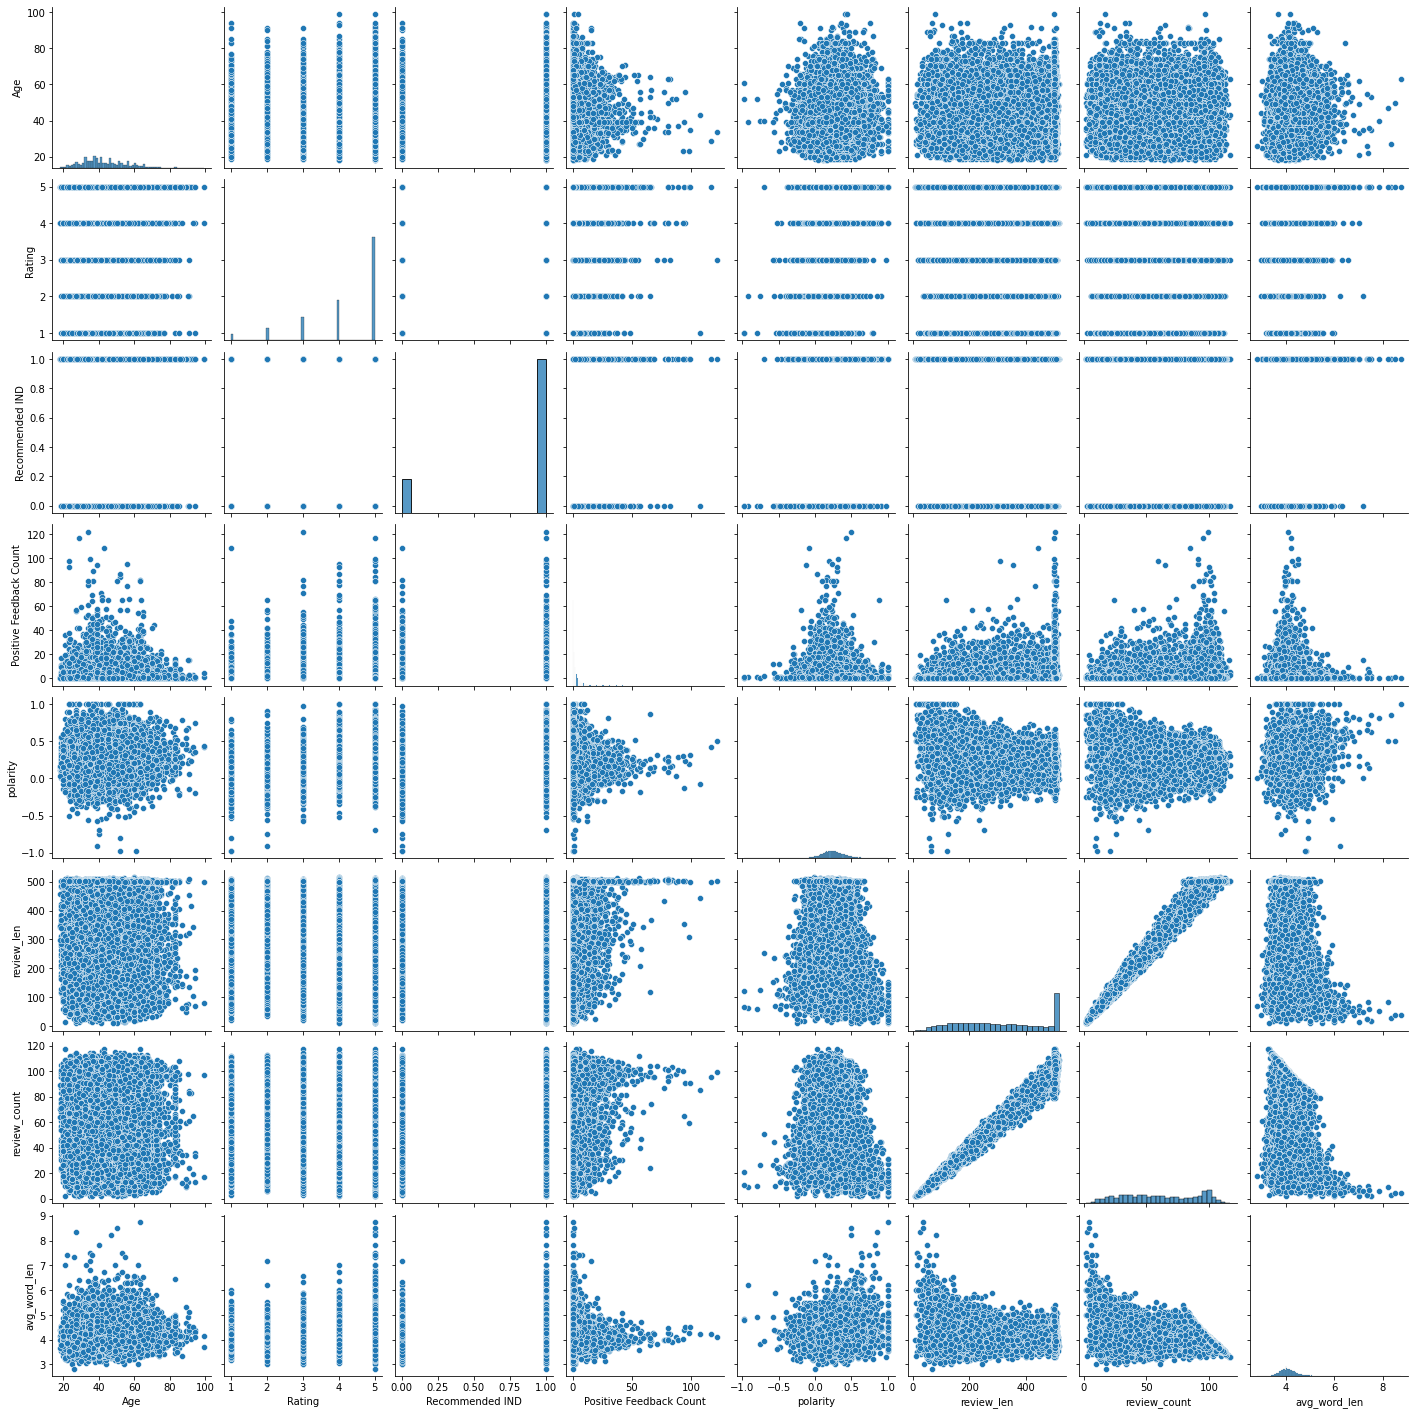

In [77]:
sns.pairplot(df)

* There is positive correlation between polarity and avg word length, which means as the avg word increases the sentiment of the text also becomes positive.
* There is also positive correlation between positive feedback count and polarity which means as the positive feedback count is more there is a positive polarity.


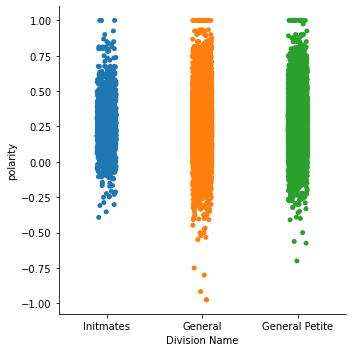

In [78]:
# Polarity of Division Name.
sns.catplot(x='Division Name', y='polarity', data=df)

* General Division Name has maximum polarity and also has many negative polarity counts.
* Initmates has minimum polarity and also has very few negative polarity counts.

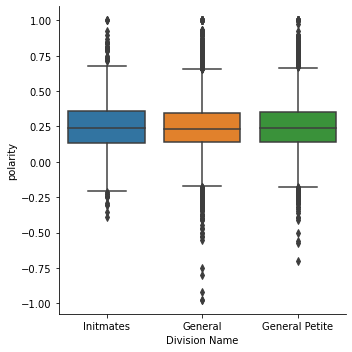

In [79]:
sns.catplot(x='Division Name', y='polarity', data=df, kind='box')

* Median of the Division Name has polarity at 0.25 that means most of the reviews are positive.

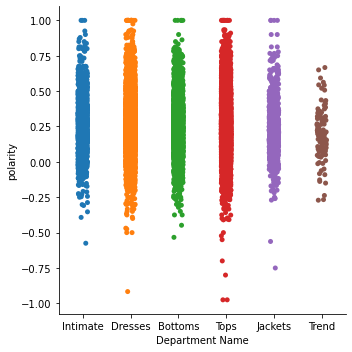

In [80]:
# Polarity of Department Name 
sns.catplot(x='Department Name', y='polarity', data=df)

* Tops department has maximum reviews.
* Trend department has minimum reviews.
* Tops, Bottoms, Dresses together consist the max part of reviews.

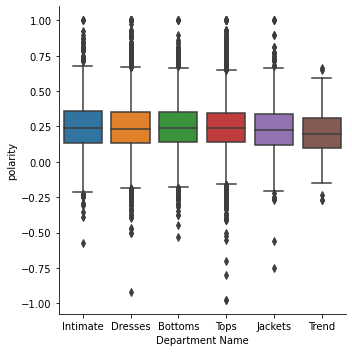

In [81]:
sns.catplot(x='Department Name', y='polarity', data=df, kind='box')

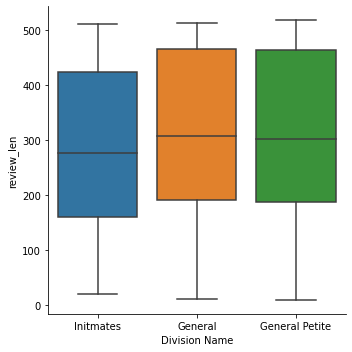

In [82]:
sns.catplot(x='Division Name', y='review_len', data=df, kind='box')

* General Petite and General Division Name has almost similar review length.
* Initmates has the minimum review length.

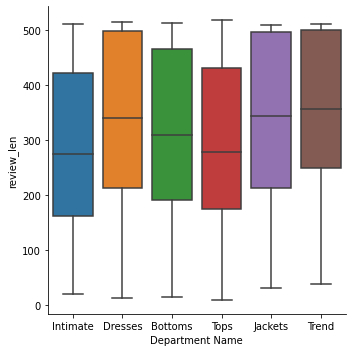

In [83]:
sns.catplot(x='Department Name', y='review_len', data=df, kind='box')

* Jackets, Trend and Dresses has larger review length as compared to Tops and Intimate Departments.

### Distribution of Sentiment Polarity of Reviews Based on the Recommendation

In [84]:
import plotly.express as px
import plotly.graph_objects as go

In [85]:
x1 = df[df['Recommended IND']==1]['polarity']
x1

0        0.633333
1        0.339583
3        0.550000
4        0.512891
6        0.133750
           ...   
23479    0.153443
23481    0.552667
23482    0.091667
23484    0.155556
23485    0.413889
Name: polarity, Length: 18527, dtype: float64

In [86]:
x0 = df[df['Recommended IND']==0]['polarity']
x0

2        0.073675
5        0.178750
10      -0.097149
22      -0.045595
25       0.261508
           ...   
23449   -0.039583
23450    0.215368
23460    0.100370
23478   -0.078788
23483    0.414286
Name: polarity, Length: 4101, dtype: float64

In [87]:
trace0 = go.Histogram(x= x0, name ='Not Recommended', opacity=0.7)
trace1 = go.Histogram(x= x1, name='Recommended', opacity=0.7)

In [88]:
data = [trace0, trace1]
layout = go.Layout(barmode='overlay', title='Distribution of Sentiment Polarity of Reviews Based on the Recommendation')
fig = go.Figure(data=data, layout=layout)
fig.show()

### Distribution of Ratings Based on Recommendation

In [89]:
x1 = df[df['Recommended IND']==1]['Rating']
x1

0        4
1        5
3        5
4        5
6        5
        ..
23479    5
23481    5
23482    3
23484    3
23485    5
Name: Rating, Length: 18527, dtype: int64

In [90]:
x0 = df[df['Recommended IND']==0]['Rating']
x0

2        3
5        2
10       3
22       2
25       3
        ..
23449    3
23450    3
23460    3
23478    1
23483    3
Name: Rating, Length: 4101, dtype: int64

In [91]:
trace0 = go.Histogram(x= x0, name ='Not Recommended', opacity=0.7)
trace1 = go.Histogram(x= x1, name='Recommended', opacity=0.7)

In [92]:
data = [trace0, trace1]
layout = go.Layout(barmode='overlay', title='Distribution of Reviews Rating Based on the Recommendation')
fig = go.Figure(data=data, layout=layout)
fig.show()

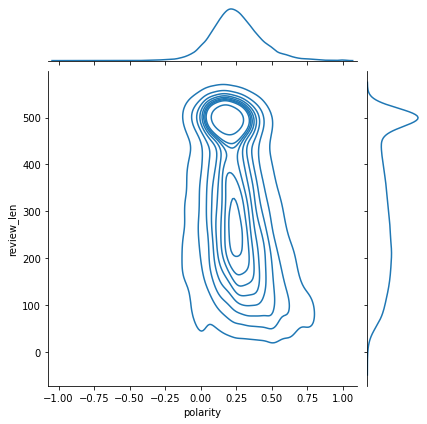

In [93]:
sns.jointplot(x='polarity', y='review_len', data = df, kind='kde')

* Length of the reviews is heighest at polarity 0.25.
* Length of the reviews keeps on increasing between polarity 0 to 0.25. After 0.25 polarity the review length keeps on           decreasing.

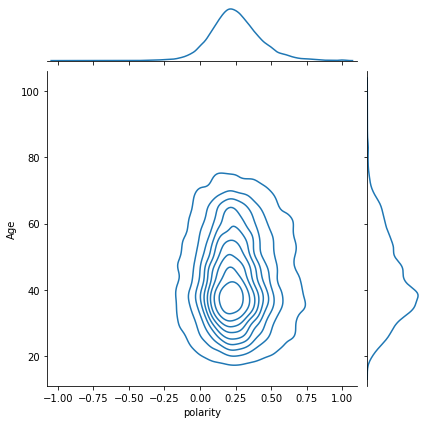

In [94]:
sns.jointplot(x='polarity', y='Age', data = df, kind='kde')

* Most of the reviews is concentrated at age 35.
* Polarity of the reviews at age 35 is around 0.25.

### **Please Upvote if you like the kernel.**